# Dang Thanh Vu - 197796

In [1]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import roc_curve, auc

def random_MixtureGaussian(N, P, m, S, cl):
    d = m.shape[1]
    c = m.shape[0]
    z = np.random.choice(np.arange(0,c), N, p=P)
    X = np.ones([1,d])
    for i in range(0,c):
        n = np.sum(z == np.array([i]*N))
        x = np.random.multivariate_normal(m[i], S[i], n)
        X = np.concatenate([X, x])
    X = X[1:]
    Y = cl*np.array(N*[1])
    return X, Y

def divergence(X1, X2):
    m, n = X1.shape[:]
    m1 = np.mean(X1, axis=0)
    m2 = np.mean(X2, axis=0)
    S1 = np.cov(X1.T)
    S2 = np.cov(X2.T)
    d = np.trace((np.linalg.inv(S1) @ S2) + (np.linalg.inv(S2) @ S1) - 2*np.identity(n))
    d = d + (np.array([m1-m2]) @ (np.linalg.inv(S1) + np.linalg.inv(S2)) @ np.array([m1-m2]).T)
    return d/(2*n)

def Bhattacharyya(X1, X2):
    m, n = X1.shape[:]
    m1 = np.mean(X1, axis=0)
    m2 = np.mean(X2, axis=0)
    S1 = np.cov(X1.T)
    S2 = np.cov(X2.T)
    A = np.log(np.linalg.det((S1 + S2)/2)/(np.sqrt(np.linalg.det(S1)*np.linalg.det(S2))))
    B = np.array([m1-m2]) @ np.linalg.inv((S1 + S2)/2) @ np.array([m1-m2]).T
    return (B/8 + A/2)/n

def ChernoffBound(X1, X2, P):
    Bh = Bhattacharyya(X1, X2)
    e = np.exp(-Bh)*np.sqrt(P[0]*P[1])
    return e

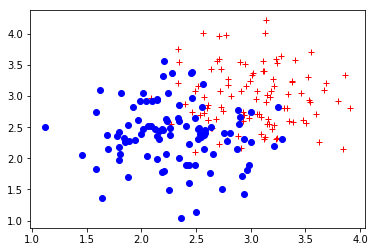

In [2]:
m1 = np.array([[3,3]])
S1 = np.array([0.2*np.identity(2)])
m2 = np.array([[2.3,2.3]])
S2 = np.array([0.2*np.identity(2)])
N = 100
P = np.array([1])
X1, Y1 = random_MixtureGaussian(N, P, m1, S1, 0)
X2, Y2 = random_MixtureGaussian(N, P, m2, S2, 1)
plt.plot(X1[:,0], X1[:,1], 'r+')
plt.plot(X2[:,0], X2[:,1], 'bo')
plt.show()

In [3]:
d = divergence(X1, X2)
print("divergence = ", d)
B = Bhattacharyya(X1, X2)
print("Bhattacharyya = ", B)
e = ChernoffBound(X1, X2, np.array([0.5, 0.5]))
print("ChernoffBound = ", e)

divergence =  [[2.45415391]]
Bhattacharyya =  [[0.3056327]]
ChernoffBound =  [[0.36832857]]


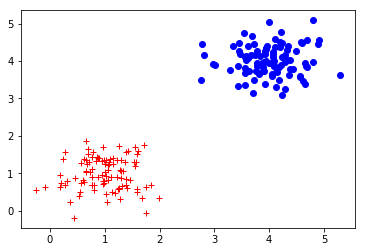

In [4]:
m1 = np.array([[1,1]])
S1 = np.array([0.2*np.identity(2)])
m2 = np.array([[4,4]])
S2 = np.array([0.2*np.identity(2)])
N = 100
P = np.array([1])
X1, Y1 = random_MixtureGaussian(N, P, m1, S1, 0)
X2, Y2 = random_MixtureGaussian(N, P, m2, S2, 1)
plt.plot(X1[:,0], X1[:,1], 'r+')
plt.plot(X2[:,0], X2[:,1], 'bo')
plt.show()

In [5]:
d = divergence(X1, X2)
print("divergence = ", d)
B = Bhattacharyya(X1, X2)
print("Bhattacharyya = ", B)
e = ChernoffBound(X1, X2, np.array([0.5, 0.5]))
print("ChernoffBound = ", e)

divergence =  [[46.78668546]]
Bhattacharyya =  [[5.81476749]]
ChernoffBound =  [[0.00149159]]


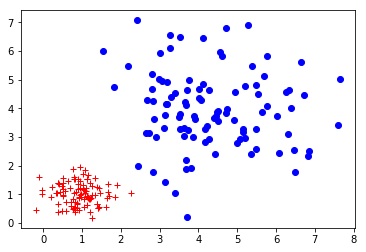

In [6]:
m1 = np.array([[1,1]])
S1 = np.array([0.2*np.identity(2)])
m2 = np.array([[4,4]])
S2 = np.array([1.9*np.identity(2)])
N = 100
P = np.array([1])
X1, Y1 = random_MixtureGaussian(N, P, m1, S1, 0)
X2, Y2 = random_MixtureGaussian(N, P, m2, S2, 1)
plt.plot(X1[:,0], X1[:,1], 'r+')
plt.plot(X2[:,0], X2[:,1], 'bo')
plt.show()

In [7]:
d = divergence(X1, X2)
print("divergence = ", d)
B = Bhattacharyya(X1, X2)
print("Bhattacharyya = ", B)
e = ChernoffBound(X1, X2, np.array([0.5, 0.5]))
print("ChernoffBound = ", e)

divergence =  [[37.34044108]]
Bhattacharyya =  [[1.69966155]]
ChernoffBound =  [[0.09137268]]
